# Table of Contents

## 01. Importing Libraries

## 02. Consistency Checks
### - Duplicate Records
### - Unique Values
### - Mixed Data Types
### - Missing Values
### - Numeric Columns
### - Non-Numeric Columns
### - Address Geocoding

## 03. Cleaning Data
### - Dropping Columns
### - Renaming Columns
### - Changing Data Types

## 04. Extracting Dataframe

---------

# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Data 

In [2]:
# the path for the file shortcut

path= r'C:\Users\princess\Downloads\12-23 Gun Violence Analysis'

In [3]:
# importing the gun violence data

df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'gun-violence-data_01-2013_03-2018.csv'))

In [4]:
# looking at the dataframe

df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [5]:
df.shape

(239677, 29)

---------

# 02. Consistency Checks

### Duplicate Records

In [6]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


There does not seem to be any duplicate rows in the dataset!

### Unique Values

In [7]:
# Check for duplicate incident_id to see if all the rows are unique

duplicate_incident_ids = df[df['incident_id'].duplicated()]
print("Number of duplicate incident_id:", len(duplicate_incident_ids))

Number of duplicate incident_id: 0


In [8]:
# Check for overall duplicates
overall_duplicates = df[df.duplicated()]

# Print the overall duplicates
print("Number of overall duplicates:", len(overall_duplicates))

Number of overall duplicates: 0


There are no duplicates within the dataframe!

### Mixed Data Type

In [9]:
# Checking for mixed-type data

for col in df.columns.tolist():
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df[weird]) > 0:
        print (col)

address
source_url
gun_stolen
gun_type
incident_characteristics
location_description
notes
participant_age
participant_age_group
participant_gender
participant_name
participant_relationship
participant_status
participant_type
sources


### Missing Values

In [10]:
# Check for missing values in each column
missing_values = df.isnull().sum()

In [11]:
# Display the count of missing values for each column
print(missing_values)

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

I will need to investiage why there are so many missing values and what to do with them. 

### Numeric Columns

#### Examining numeric columns to see the summary statistics and distributions for anamolies.

In [12]:
# Summary statistics

df.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


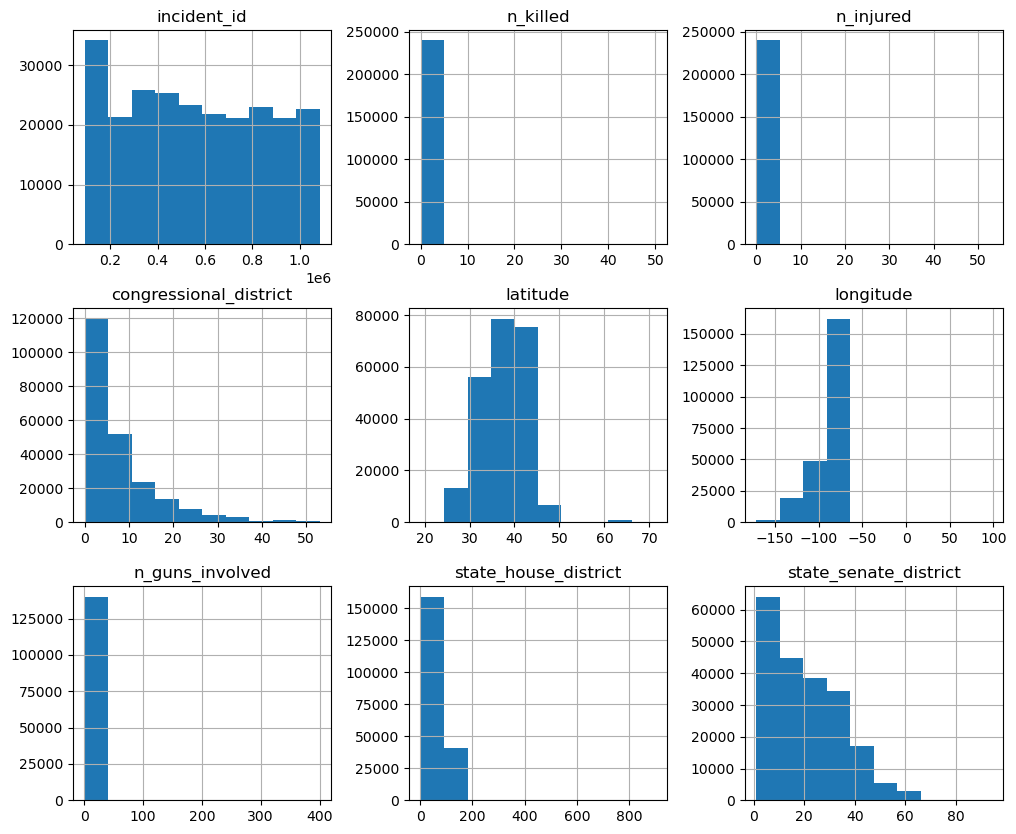

In [13]:
# Distribution of numeric columns

df.hist(figsize=(12, 10))
plt.show()

### Non-Numeric Columns

In [14]:
# Check unique values and counts for 'state' column

state_counts = df['state'].value_counts()
print(state_counts)

state
Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kans

Illinois, California, Florida, Texas, and Ohio are the top 5 states with the most incidents.

In [15]:
# Check unique values and counts for 'address' column

address_counts = df['address'].value_counts()
print(address_counts)

address
2375 International Pkwy                160
6000 N Terminal Pkwy                   141
Main Street                            131
3400 E Sky Harbor Blvd                 127
8500 Peña Blvd                          99
                                      ... 
1300 block of Dean Street                1
Bardell and Vine avenues                 1
4235 North Armenia Blvd                  1
8700 block of South Sangamon Street      1
434 Skowhegan Rd                         1
Name: count, Length: 198037, dtype: int64


It seems there are some addresses/locations that have repeated offenses of gun violence. Will look into those.

In [16]:
# Check unique values and counts for 'incident_characteristics' column

incident_characteristics_counts = df['incident_characteristics'].value_counts()
print(incident_characteristics_counts)

incident_characteristics
Shot - Wounded/Injured                                                                                                                                                                                                                                                                                                                                                                                                         47541
Shot - Dead (murder, accidental, suicide)                                                                                                                                                                                                                                                                                                                                                                                      23019
Shots Fired - No Injuries                                                                                                            

The "Shot - Wounded/Injured" has the most accounts.

In [17]:
# Check for negative values in victim counts to make sure there are no anamolies.

negative_victims = df[(df['n_killed'] < 0) | (df['n_injured'] < 0)]
print("Rows with negative victim counts:", len(negative_victims))

Rows with negative victim counts: 0


### Address Geocoding

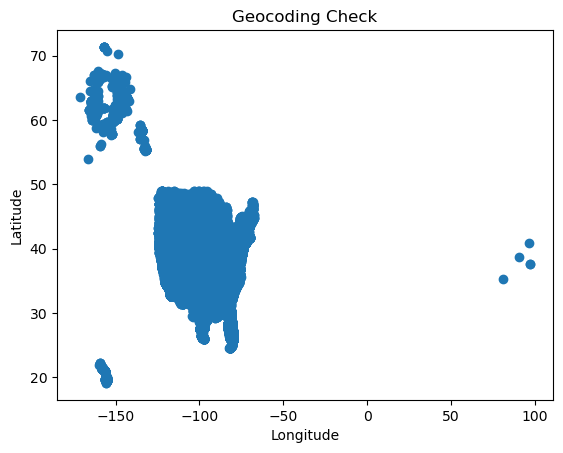

In [18]:
# Check for outliers or inconsistencies in latitude and longitude 

plt.scatter(df['longitude'], df['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geocoding Check')
plt.show()

Most are clustered around the same areas, but there does seem to be outliers. Will need to look into these.

In [19]:
# Check consistency between 'n_killed' and 'n_injured'

inconsistencies = df[df['n_killed'] > df['n_injured']]
print("Rows with inconsistencies:", len(inconsistencies))

Rows with inconsistencies: 45887


This check is to see how many rows there are where there is more n_killed then n_injured. Typically, number of people injured is greater than those killed. So, having 45, 887 rows with that inconsistency of n_killed > n_injured is a large number of inconsistencies. I will investigate this.

In [20]:
# summary statistics of n_killed and n_injured 

print(df[['n_killed', 'n_injured']].describe())

            n_killed      n_injured
count  239677.000000  239677.000000
mean        0.252290       0.494007
std         0.521779       0.729952
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       1.000000
max        50.000000      53.000000


In [21]:
#examining rows where n_killed > n_injured

inconsistent_rows = df[df['n_killed'] > df['n_injured']]
print(inconsistent_rows.head())

    incident_id        date       state city_or_county  \
3        478925  2013-01-05    Colorado         Aurora   
5        478948  2013-01-07    Oklahoma          Tulsa   
6        479363  2013-01-19  New Mexico    Albuquerque   
20       480327  2013-02-11    Delaware     Wilmington   
21       480344  2013-02-12        Utah        Midvale   

                                  address  n_killed  n_injured  \
3        16000 block of East Ithaca Place         4          0   
5              6000 block of South Owasso         4          0   
6                          2806 Long Lane         5          0   
20                  500 North King Street         3          2   
21  8286 Adams Street and 450 West Street         4          1   

                                         incident_url  \
3   http://www.gunviolencearchive.org/incident/478925   
5   http://www.gunviolencearchive.org/incident/478948   
6   http://www.gunviolencearchive.org/incident/479363   
20  http://www.gunviolence

I've looked at the data and examined the cases, and they seem to be legitimate, despite the high amount of inconsistencies. Perhaps what has happened is that some sources have differnet data collection practices, there could be reporting delays,and of course, in real world cases, things like this are highly possible, even if uncommon. 

---------

# 03. Cleaning Data

In [22]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


### Dropping Columns

In [23]:
# Drop the unnecessary columns 
df.drop(['source_url','incident_url','incident_url_fields_missing','gun_stolen','sources','state_house_district','state_senate_district'], axis = 1, inplace = True)

In [24]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_type,incident_characteristics,...,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,...,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",...,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...


In [25]:
df.columns.values

array(['incident_id', 'date', 'state', 'city_or_county', 'address',
       'n_killed', 'n_injured', 'congressional_district', 'gun_type',
       'incident_characteristics', 'latitude', 'location_description',
       'longitude', 'n_guns_involved', 'notes', 'participant_age',
       'participant_age_group', 'participant_gender', 'participant_name',
       'participant_relationship', 'participant_status',
       'participant_type'], dtype=object)

### Renaming Columns

In [26]:
#Renaming column names so they are all consistent

df.rename(columns = {'incident_id' : 'Incident ID'}, inplace = True)

df.rename(columns = {'date' : 'Date'}, inplace = True)

df.rename(columns = {'state' : 'State'}, inplace = True)

df.rename(columns = {'city_or_county' : 'City or County'}, inplace = True)

df.rename(columns = {'address' : 'Address'}, inplace = True)

df.rename(columns = {'n_killed' : 'Number Killed'}, inplace = True)

df.rename(columns = {'n_injured' : 'Number Injured'}, inplace = True)

df.rename(columns = {'congressional_district' : 'Congressional District'}, inplace = True)

df.rename(columns = {'gun_type' : 'Gun Type'}, inplace = True)

df.rename(columns = {'incident_characteristics' : 'Incident Characteristics'}, inplace = True)

df.rename(columns = {'latitude' : 'Latitude'}, inplace = True)

df.rename(columns = {'location_description' : 'Location Description'}, inplace = True)

df.rename(columns = {'longitude' : 'Longitude'}, inplace = True)

df.rename(columns = {'n_guns_involved' : 'Number of Guns Involved'}, inplace = True)

df.rename(columns = {'notes' : 'Notes'}, inplace = True)

df.rename(columns = {'participant_age' : 'Participant Ages'}, inplace = True)

df.rename(columns = {'participant_age_group' : 'Participant Age Groups'}, inplace = True)

df.rename(columns = {'participant_gender' : 'Participant Genders'}, inplace = True)

df.rename(columns = {'participant_name' : 'Participant Names'}, inplace = True)

df.rename(columns = {'participant_relationship' : 'Participant Relationships'}, inplace = True)

df.rename(columns = {'participant_status' : 'Participant Statuses'}, inplace = True)

df.rename(columns = {'participant_type' : 'Participant Types'}, inplace = True)

In [27]:
df.columns.values

array(['Incident ID', 'Date', 'State', 'City or County', 'Address',
       'Number Killed', 'Number Injured', 'Congressional District',
       'Gun Type', 'Incident Characteristics', 'Latitude',
       'Location Description', 'Longitude', 'Number of Guns Involved',
       'Notes', 'Participant Ages', 'Participant Age Groups',
       'Participant Genders', 'Participant Names',
       'Participant Relationships', 'Participant Statuses',
       'Participant Types'], dtype=object)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Incident ID                239677 non-null  int64  
 1   Date                       239677 non-null  object 
 2   State                      239677 non-null  object 
 3   City or County             239677 non-null  object 
 4   Address                    223180 non-null  object 
 5   Number Killed              239677 non-null  int64  
 6   Number Injured             239677 non-null  int64  
 7   Congressional District     227733 non-null  float64
 8   Gun Type                   140226 non-null  object 
 9   Incident Characteristics   239351 non-null  object 
 10  Latitude                   231754 non-null  float64
 11  Location Description       42089 non-null   object 
 12  Longitude                  231754 non-null  float64
 13  Number of Guns Involved    14

### Changing Data Types

In [29]:
# Updating date columns to datetime
df[['Date']] = df[['Date']].astype('datetime64[ns]')

# Updating 'str' relevant columns that were saved as object
df[['Incident ID']] = df[['Incident ID']].astype('str')

# Updating selected columns to 'category' data type
columns_to_convert_to_category = ['State', 'City or County', 'Gun Type', 'Incident Characteristics', 'Location Description', 'Notes', 'Participant Age Groups', 'Participant Genders', 'Participant Names', 'Participant Relationships', 'Participant Statuses', 'Participant Types']

df[columns_to_convert_to_category] = df[columns_to_convert_to_category].astype('category')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Incident ID                239677 non-null  object        
 1   Date                       239677 non-null  datetime64[ns]
 2   State                      239677 non-null  category      
 3   City or County             239677 non-null  category      
 4   Address                    223180 non-null  object        
 5   Number Killed              239677 non-null  int64         
 6   Number Injured             239677 non-null  int64         
 7   Congressional District     227733 non-null  float64       
 8   Gun Type                   140226 non-null  category      
 9   Incident Characteristics   239351 non-null  category      
 10  Latitude                   231754 non-null  float64       
 11  Location Description       42089 non-null   category

---------

# 04. Extracting Dataframe

In [31]:
# exporting df to csv
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data',
'6.1_gun_violence_cleaned.csv'))